In [1]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# Librerías de visualización
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

In [2]:
df = pd.read_csv("df_limpieza2.csv")
df.sample(4)

,employee_id,age,attrition,businesstravel,$_dailyrate,department,distancefromhome,education,educationfield,environmentsatisfaction,gender,$_hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,$_monthlyincome,$_monthlyrate,numcompaniesworked,overtime,%_percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager,datebirth,$_salary,remotework
433,434,40,No,travel_rarely,1582.77,human resources,6,2,NaN,3,male,197.85,3,4,manager,4,single,12783.92,33238.20,1,yes,21,4.0,4,full time,0,21.0,2,3.0,21,NaN,7,7,1983,153407.07,yes
775,776,26,No,travel_rarely,556.26,sales,10,3,NaN,3,male,NaN,3,2,sales executive,4,NaN,4492.84,11681.39,1,no,13,3.0,1,NaN,0,NaN,4,3.0,5,NaN,1,2,1997,NaN,no
410,411,36,No,travel_rarely,731.92,NaN,10,4,technical degree,4,female,NaN,3,3,healthcare representative,3,married,NaN,15370.33,3,no,12,3.0,1,part time,0,NaN,0,3.0,7,NaN,1,7,1987,70940.00,yes
348,349,56,No,travel_rarely,1145.55,NaN,9,3,NaN,3,male,143.19,3,4,healthcare representative,4,married,9252.50,24056.50,7,no,11,3.0,3,full time,0,30.0,1,2.0,10,NaN,1,1,1967,111030.00,no


1. Identificar y contabilizar los nulos en las columnas

In [3]:
colum_nulos = df.isnull().sum() 
colum_nulos

employee_id                    0
age                            0
attrition                      0
businesstravel                 0
$_dailyrate                    0
department                  1312
distancefromhome               0
education                      0
educationfield               745
environmentsatisfaction        0
gender                         0
$_hourlyrate                1210
jobinvolvement                 0
joblevel                       0
jobrole                        0
jobsatisfaction                0
maritalstatus                651
$_monthlyincome              468
$_monthlyrate                  0
numcompaniesworked             0
overtime                     676
%_percentsalaryhike            0
performancerating            195
relationshipsatisfaction       0
standardhours                338
stockoptionlevel               0
totalworkingyears            526
trainingtimeslastyear          0
worklifebalance              108
yearsatcompany                 0
yearsincur

In [4]:
df_nulos = pd.DataFrame(colum_nulos, columns = ["cantidad_nulos"])

df_nulos[df_nulos["cantidad_nulos"] > 0]

,cantidad_nulos
department,1312
educationfield,745
$_hourlyrate,1210
maritalstatus,651
$_monthlyincome,468
overtime,676
performancerating,195
standardhours,338
totalworkingyears,526
worklifebalance,108


3. Identificar columnas categoricas.

In [5]:
# Obtenemos la lista de columnas categóricas que tienen nulos
nulos_esta_cat = df[df.columns[df.isnull().any()]].select_dtypes(include = "O").columns
print("Las columnas categóricas que tienen nulos son : \n ")
print(nulos_esta_cat)

Las columnas categóricas que tienen nulos son : 
 
Index(['department', 'educationfield', 'maritalstatus', 'overtime',
       'standardhours'],
      dtype='object')


4. Identificar los valores que dominan en una fila categorica.

In [6]:
for col in nulos_esta_cat:
    print(f"La distribución de las categorías para la columna {col.upper()}")
    display(df[col].value_counts() / df.shape[0])  # display es una función utilizada para mostrar objetos de manera más legible en Jupyter Notebooks o entornos similares. 
    print("........................")

La distribución de las categorías para la columna DEPARTMENT


department
research & development     0.121437
sales                      0.056382
human resources            0.009294
Name: count, dtype: float64

........................
La distribución de las categorías para la columna EDUCATIONFIELD


educationfield
life sciences       0.216233
medical             0.171004
marketing           0.064436
technical degree    0.042751
other               0.036555
human resources     0.007435
Name: count, dtype: float64

........................
La distribución de las categorías para la columna MARITALSTATUS


maritalstatus
married     0.271995
single      0.201363
divorced    0.123296
Name: count, dtype: float64

........................
La distribución de las categorías para la columna OVERTIME


overtime
no     0.422553
yes    0.158612
Name: count, dtype: float64

........................
La distribución de las categorías para la columna STANDARDHOURS


standardhours
part time    0.550186
full time    0.240397
Name: count, dtype: float64

........................


5. Clasificar las columnas.

In [7]:
columnas_moda = ["overtime", "standardhours" ]
columnas_desconocido = ['department', 'educationfield', 'maritalstatus']

6. Reemplazar por la moda.

In [8]:
# iteramos por la lista creada en el paso anterior:
for columna in columnas_moda:
    
    # calculamos la moda para la columna por la que estamos iterando
    moda = df[columna].mode()[0]    
    
    # utilizando el método fillna reemplazamos los valores nulos por la moda calculada en el paso anterior. 
    df[columna] = df[columna].fillna(moda)

# por último chequeamos si se han eliminado los nulos en las columnas de "marital" y "loan"
print("Después del reemplazo usando 'fillna' quedan los siguientes nulos")

df[columnas_moda].isnull().sum()

Después del reemplazo usando 'fillna' quedan los siguientes nulos


overtime         0
standardhours    0
dtype: int64

7. Reemplazar por None.

In [9]:
# iteramos por la lista de columnas a las que le vamos a cambiar los nulos por "None"
for columna in columnas_desconocido:
    
    # reemplazamos los nulos por el valor "None" para cada una de las columnas de la lista
    df[columna] = df[columna].fillna("None")
    
# comprobamos si quedan nulos en las columnas categóricas. 
print("Después del reemplazo usando 'fillna' quedan los siguientes nulos")
df[columnas_desconocido].isnull().sum()

Después del reemplazo usando 'fillna' quedan los siguientes nulos


department        0
educationfield    0
maritalstatus     0
dtype: int64

8. Identificar columnas numericas.

In [10]:
# Obtenemos la lista de columnas numericas que tienen nulos
nulos_esta_num = df[df.columns[df.isnull().any()]].select_dtypes(include = np.number).columns
print("Las columnas numéricas que tienen nulos son : \n ")
print(nulos_esta_num)

Las columnas numéricas que tienen nulos son : 
 
Index(['$_hourlyrate', '$_monthlyincome', 'performancerating',
       'totalworkingyears', 'worklifebalance', 'yearsincurrentrole',
       '$_salary'],
      dtype='object')


9. Calcular el número de nulos en cada columna numerica

In [11]:
for col in nulos_esta_num:
    print(f"La distribución de las categorías para la columna {col.upper()}")
    display(df[col].value_counts() / df.shape[0])  # display es una función utilizada para mostrar objetos de manera más legible en Jupyter Notebooks o entornos similares. 
    print("........................")

La distribución de las categorías para la columna $_HOURLYRATE


$_hourlyrate
36.25     0.046468
69.53     0.045849
129.06    0.023544
197.85    0.008674
246.75    0.004957
            ...   
59.96     0.000620
28.21     0.000620
54.91     0.000620
227.49    0.000620
133.16    0.000620
Name: count, Length: 194, dtype: float64

........................
La distribución de las categorías para la columna $_MONTHLYINCOME


$_monthlyincome
4492.84     0.138786
2342.59     0.135688
8339.32     0.060719
12783.92    0.026022
15943.72    0.014870
              ...   
5415.83     0.000620
4994.17     0.000620
3806.67     0.000620
13920.00    0.000620
3705.83     0.000620
Name: count, Length: 493, dtype: float64

........................
La distribución de las categorías para la columna PERFORMANCERATING


performancerating
3.0    0.746592
4.0    0.132590
Name: count, dtype: float64

........................
La distribución de las categorías para la columna TOTALWORKINGYEARS


totalworkingyears
10.0    0.089219
8.0     0.053284
6.0     0.052045
9.0     0.042751
5.0     0.040892
7.0     0.034696
4.0     0.033457
1.0     0.032838
12.0    0.021066
3.0     0.019827
14.0    0.018587
13.0    0.018587
11.0    0.017968
15.0    0.017348
16.0    0.017348
20.0    0.017348
18.0    0.016729
21.0    0.014250
17.0    0.013631
2.0     0.013011
22.0    0.011152
19.0    0.010533
24.0    0.008674
23.0    0.008055
28.0    0.008055
26.0    0.004957
0.0     0.004957
29.0    0.003717
36.0    0.003717
25.0    0.003717
33.0    0.003717
37.0    0.003098
27.0    0.003098
31.0    0.002478
30.0    0.001859
32.0    0.001859
35.0    0.001859
40.0    0.001859
34.0    0.001239
38.0    0.000620
Name: count, dtype: float64

........................
La distribución de las categorías para la columna WORKLIFEBALANCE


worklifebalance
3.0    0.565675
2.0    0.222429
4.0    0.096035
1.0    0.048947
Name: count, dtype: float64

........................
La distribución de las categorías para la columna YEARSINCURRENTROLE


yearsincurrentrole
2.0     0.006815
7.0     0.003098
0.0     0.002478
4.0     0.001859
1.0     0.001859
11.0    0.001239
6.0     0.001239
3.0     0.001239
13.0    0.000620
12.0    0.000620
Name: count, dtype: float64

........................
La distribución de las categorías para la columna $_SALARY


$_salary
53914.11     0.161710
28111.13     0.151177
100071.84    0.071252
153407.07    0.027881
191324.62    0.016729
               ...   
42210.00     0.000620
129360.00    0.000620
53680.00     0.000620
31960.00     0.000620
42440.00     0.000620
Name: count, Length: 583, dtype: float64

........................


In [12]:
df[nulos_esta_num].isnull().sum() / df.shape[0]

$_hourlyrate          0.749690
$_monthlyincome       0.289963
performancerating     0.120818
totalworkingyears     0.325898
worklifebalance       0.066914
yearsincurrentrole    0.978934
$_salary              0.169765
dtype: float64

10. Revisar si dentro de las columnas donde tenemos nulos hay valores atípicos. 
`Para hacer esto lo mejor es usar graficas`.

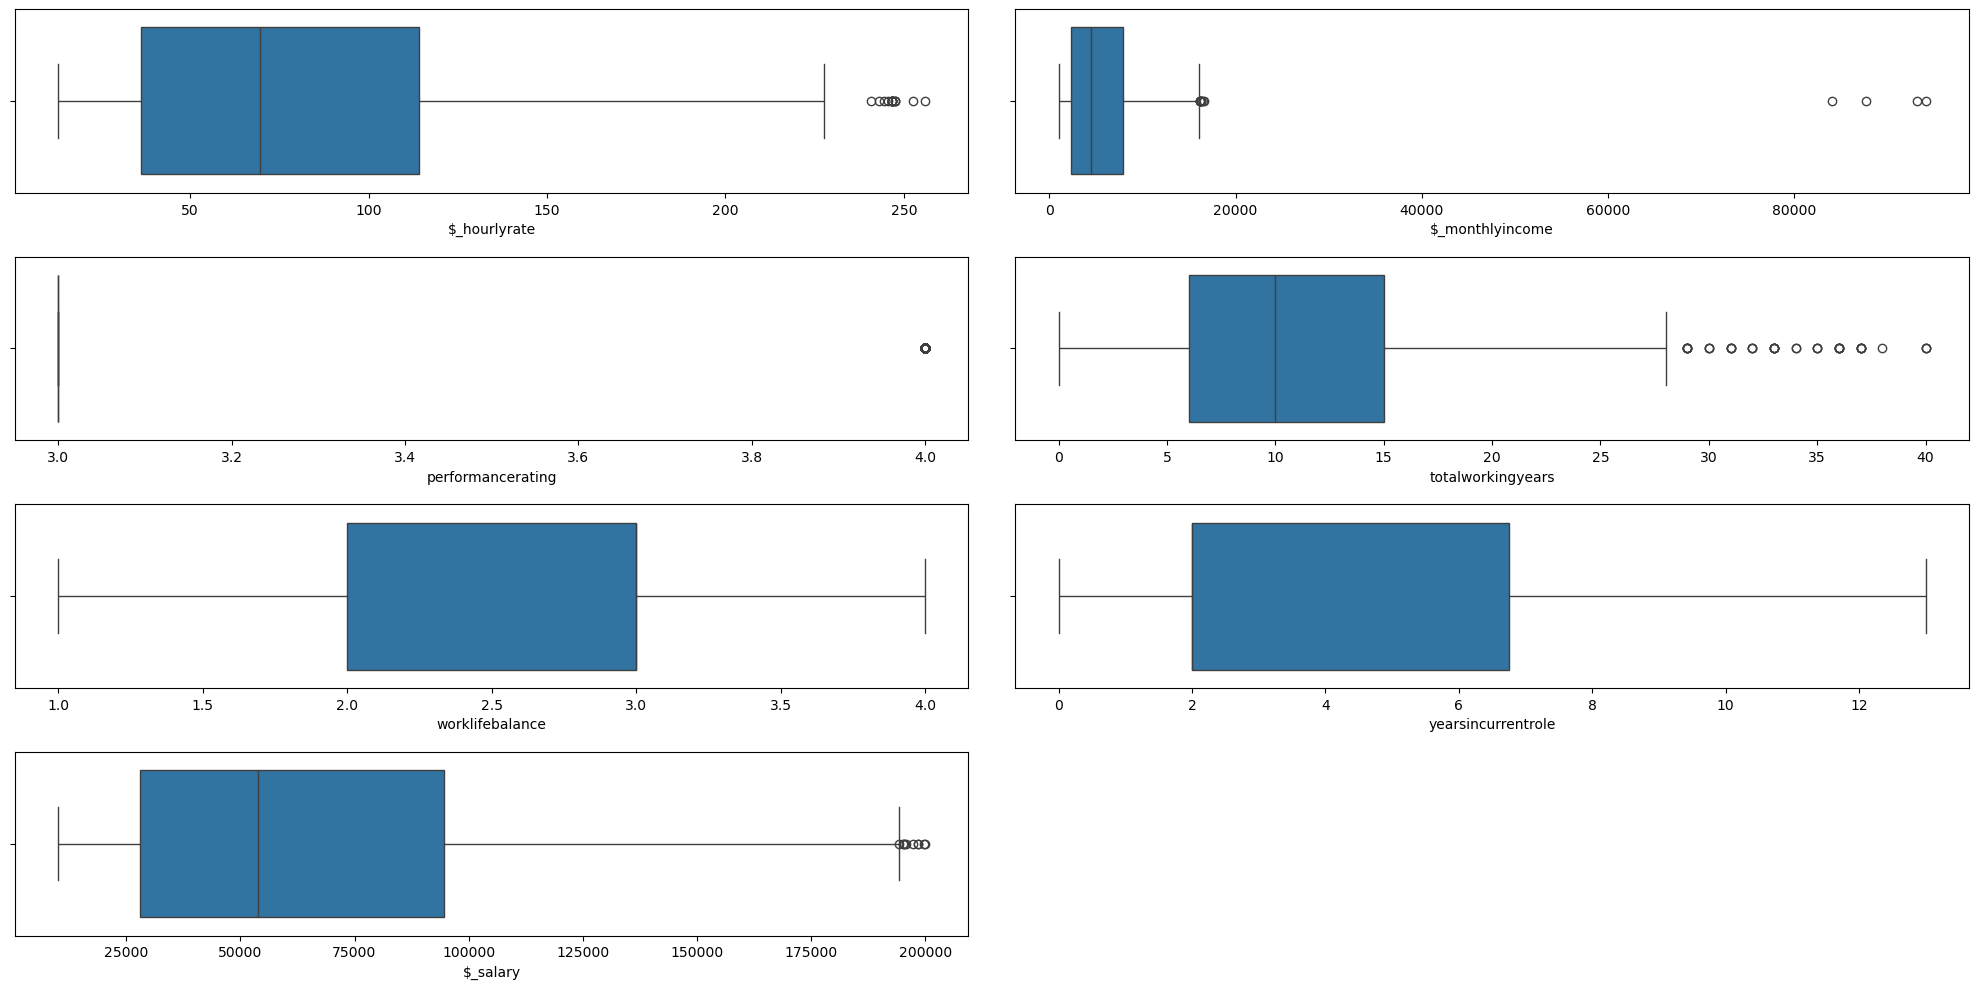

In [13]:
fig, axes = plt.subplots(nrows = 4, ncols = 2, figsize = (20,10)) 

axes = axes.flat

for indice, col in enumerate(nulos_esta_num):
    sns.boxplot(x = col, data = df, ax = axes[indice])
    
plt.tight_layout()
fig.delaxes(axes[-1]);

* Los OUTLIERS son todos aquellos puntos que se ven más allá de los bigotes de las gráficas, por lo tanto, tenemos valores atípicos en las columnas de `$_hourlyrate`, `$_monthlyincome`, `performancerating`, `totalworkingyears`, `$_salary`. Las columnas tienen valores atípicos por lo que optaremos por reemplazar los nulos con métodos más avanzados como KNNImputer o IterativeImputer. 

* Los porcentajes de valores nulos en las columnas worklifebalance y yearsincurrentrole son bastante altos:
   ** worklifebalance: 6.69%
   ** yearsincurrentrole: 97.89%

* Para yearsincurrentrole, debido al alto porcentaje de nulos, es posible que esta columna no sea útil para el análisis. Considera eliminar esta columna si no es esencial.

* Aunque el porcentaje de nulos en worklifebalances es menor que en yearsincurrentrole, sigue siendo significativo.

11. Realizar una copia para hacer una conparativa con la estadistica del archivo original.

In [14]:
df_final = df.copy()
df_final.sample(2)

,employee_id,age,attrition,businesstravel,$_dailyrate,department,distancefromhome,education,educationfield,environmentsatisfaction,gender,$_hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,$_monthlyincome,$_monthlyrate,numcompaniesworked,overtime,%_percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager,datebirth,$_salary,remotework
564,565,28,No,non_travel,435.50,None,4,3,medical,2,male,NaN,3,2,sales executive,3,None,NaN,9145.50,1,no,15,3.0,2,part time,0,5.0,3,4.0,5,NaN,0,4,1995,42210.00,yes
1612,1613,36,No,non_travel,556.26,None,8,4,technical degree,1,male,NaN,3,2,sales executive,4,divorced,4492.84,11681.39,4,no,13,NaN,4,part time,2,12.0,3,3.0,7,NaN,0,7,1987,53914.11,yes


12. Para yearsincurrentrole, debido al alto porcentaje de nulos, no se considera eliminar esta columna, se remplazara por None.

In [15]:
# reemplazamos los nulos por el valor "None" para cada una de las filas de la columna
df_final["yearsincurrentrole"] = df_final["yearsincurrentrole"].fillna("None")
    
# comprobamos si quedan nulos en la columna. 
print("Después del reemplazo usando 'fillna' quedan los siguientes nulos")
df_final["yearsincurrentrole"].isnull().sum()

Después del reemplazo usando 'fillna' quedan los siguientes nulos


0

13. Por lo antes dicho, se toma al INTERATIVEIMPUTER como metodo avanzado para reemplazar los nulos.

In [16]:
imputer_iterative = IterativeImputer(max_iter = 20, random_state = 42) #max_iter=20 especifica el número máximo de iteraciones/ random_state=42 asegura la reproducibilidad de los resultados.

# fit_transform() ajusta el modelo IterativeImputer a los datos seleccionados y luego transforma los datos imputando los valores faltantes.
imputer_iterative_imputado = imputer_iterative.fit_transform(df_final[['$_hourlyrate', '$_monthlyincome', 'performancerating', 'totalworkingyears', 'worklifebalance', '$_salary']])

# comprobamos que es lo que nos devuelve, que en este caso es un array también
imputer_iterative_imputado

array([[2.51967241e+02, 1.62808300e+04, 3.00000000e+00, 3.00372319e+01,
        3.00000000e+00, 1.95370000e+05],
       [2.57925812e+02, 1.71135630e+04, 3.00000000e+00, 3.40000000e+01,
        3.00000000e+00, 1.99990000e+05],
       [2.48033352e+02, 1.64648491e+04, 3.00000000e+00, 2.20000000e+01,
        2.80232575e+00, 1.92320000e+05],
       ...,
       [1.29060332e+02, 8.66226353e+03, 3.00000000e+00, 9.00000000e+00,
        3.00000000e+00, 1.00071840e+05],
       [6.95307819e+01, 4.49284000e+03, 3.15420498e+00, 1.20000000e+01,
        3.00000000e+00, 5.39141100e+04],
       [1.39865977e+02, 9.03750000e+03, 3.00000000e+00, 1.76799131e+01,
        3.00000000e+00, 1.08450000e+05]])

14. Se comprueba si tenemos nulos.

In [17]:
df_final[['$_hourlyrate', '$_monthlyincome', 'performancerating', 'totalworkingyears', 'worklifebalance', '$_salary']] = imputer_iterative_imputado

# comprobamos los nulos
print(f"Después del 'Iterative' tenemos: \n{df_final[['$_hourlyrate', '$_monthlyincome', 'performancerating', 'totalworkingyears', 'worklifebalance', '$_salary']].isnull().sum()} nulos")

Después del 'Iterative' tenemos: 
$_hourlyrate         0
$_monthlyincome      0
performancerating    0
totalworkingyears    0
worklifebalance      0
$_salary             0
dtype: int64 nulos


15. Comparación de estadistica.

In [18]:
df_final.describe()[['$_hourlyrate', '$_monthlyincome', 'performancerating', 'totalworkingyears', 'worklifebalance', '$_salary']]

,$_hourlyrate,$_monthlyincome,performancerating,totalworkingyears,worklifebalance,$_salary
count,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000
mean,84.043307,5709.878992,3.150839,11.419321,2.759417,65166.755068
std,55.732313,5680.146296,0.335680,7.456759,0.678701,43213.185709
min,13.010000,1000.000000,3.000000,-31.835675,1.000000,10090.000000
25%,36.252663,2467.479016,3.000000,6.258229,2.000000,28111.130000
50%,69.530662,4492.840000,3.000000,10.000000,3.000000,53914.110000
75%,107.268103,8008.540000,3.118313,15.000000,3.000000,83174.529201
max,275.542095,94083.000000,4.000000,40.000000,4.000000,213649.716957


In [19]:
df.describe()[['$_hourlyrate', '$_monthlyincome', 'performancerating', 'totalworkingyears', 'worklifebalance', '$_salary']]

,$_hourlyrate,$_monthlyincome,performancerating,totalworkingyears,worklifebalance,$_salary
count,404.000000,1146.000000,1419.00000,1088.000000,1506.000000,1340.000000
mean,83.042302,5697.600227,3.15081,11.318934,2.759628,65245.875313
std,57.548806,6234.554870,0.35799,7.727675,0.702622,45933.029687
min,13.010000,1000.000000,3.00000,0.000000,1.000000,10090.000000
25%,36.250000,2342.590000,3.00000,6.000000,2.000000,28111.130000
50%,69.530000,4492.840000,3.00000,10.000000,3.000000,53914.110000
75%,114.160000,7861.670000,3.00000,15.000000,3.000000,94607.500000
max,255.960000,94083.000000,4.00000,40.000000,4.000000,199990.000000


16 . Se eliminan los negativos de totalworkingyears que se generaron de manera aleatoria

In [20]:
df_final["totalworkingyears"] = df_final["totalworkingyears"].abs()

In [21]:
df_final.describe()[['$_hourlyrate', '$_monthlyincome', 'performancerating', 'totalworkingyears', 'worklifebalance', '$_salary']]

,$_hourlyrate,$_monthlyincome,performancerating,totalworkingyears,worklifebalance,$_salary
count,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000
mean,84.043307,5709.878992,3.150839,11.530297,2.759417,65166.755068
std,55.732313,5680.146296,0.335680,7.283874,0.678701,43213.185709
min,13.010000,1000.000000,3.000000,0.000000,1.000000,10090.000000
25%,36.252663,2467.479016,3.000000,6.258229,2.000000,28111.130000
50%,69.530662,4492.840000,3.000000,10.000000,3.000000,53914.110000
75%,107.268103,8008.540000,3.118313,15.000000,3.000000,83174.529201
max,275.542095,94083.000000,4.000000,40.000000,4.000000,213649.716957


In [23]:
df_final.sample(10)

,employee_id,age,attrition,businesstravel,$_dailyrate,department,distancefromhome,education,educationfield,environmentsatisfaction,gender,$_hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,$_monthlyincome,$_monthlyrate,numcompaniesworked,overtime,%_percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager,datebirth,$_salary,remotework
418,419,34,No,non_travel,556.26,None,29,3,None,2,male,69.530705,3,2,laboratory technician,3,None,4492.840000,11681.39,4,no,13,3.0,1,part time,2,10.000000,1,3.000000,8,None,7,7,1989,53914.110000,no
965,966,43,No,travel_frequently,573.86,None,1,3,life sciences,4,female,83.270479,3,2,healthcare representative,4,married,4635.000000,12051.00,4,no,13,3.0,2,part time,1,12.000000,2,2.000000,5,None,2,2,1980,64567.518934,yes
1160,1161,36,No,non_travel,556.26,None,13,2,life sciences,13,female,69.530000,3,2,manufacturing director,2,None,4758.075797,11681.39,7,no,13,3.0,2,part time,3,18.000000,3,3.000000,4,None,0,2,1987,53914.110000,yes
147,148,44,No,travel_rarely,1979.92,None,4,2,life sciences,3,male,247.490000,4,5,manager,1,divorced,15991.670000,41578.33,1,no,14,3.0,4,full time,2,29.543913,4,2.000000,25,None,14,13,1979,191900.000000,no
1051,1052,25,Yes,travel_rarely,453.97,None,9,2,None,1,male,56.744320,2,1,sales representative,1,None,3919.548309,9533.33,3,no,12,3.0,1,full time,0,6.000000,2,3.000000,3,None,2,2,1998,44000.000000,yes
168,169,43,No,travel_rarely,1032.49,None,11,3,life sciences,1,male,129.060000,3,3,healthcare representative,3,married,8339.320000,21682.23,1,no,17,3.0,2,part time,1,10.000000,1,3.000000,10,None,0,9,1980,100071.840000,yes
785,786,38,No,travel_frequently,548.99,None,6,4,None,1,male,75.913591,2,2,manufacturing director,3,married,4434.170000,11528.83,2,no,11,3.0,4,part time,1,10.000000,1,3.000000,8,None,7,7,1985,58863.234384,no
393,394,35,No,travel_rarely,1032.49,None,2,3,None,3,male,107.761734,2,3,manufacturing director,2,divorced,8339.320000,21682.23,2,no,18,3.0,2,part time,1,15.000000,2,4.000000,7,None,6,4,1988,83557.282633,yes
1410,1411,34,No,non_travel,306.63,None,13,4,medical,13,male,38.327407,3,1,research scientist,4,single,2476.670000,6439.33,1,no,13,3.0,3,full time,0,6.486960,4,2.747478,1,None,0,0,1989,29720.000000,no
811,812,26,No,non_travel,556.26,None,22,3,None,22,female,69.530510,2,2,sales executive,4,married,4492.840000,11681.39,7,yes,19,3.0,3,part time,1,5.000000,2,2.000000,2,None,0,0,1997,53914.110000,no


In [24]:
df_final.to_csv("df_final.csv")

In [25]:
df_final.to_excel("df_final.xlsx")